In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')

fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

import warnings
warnings.filterwarnings('ignore')

# 데이터 읽어오기 및 데이터 확인

In [ ]:
%cd '/content/drive/MyDrive/dacon/2023.5.18/open/'

/content/drive/MyDrive/dacon/2023.5.18/open


In [ ]:
# test 데이터를 분석에 활용하는 것은 Data Leakage에 해당하므로 train 데이터만 사용합니다.
train = pd.read_csv('train.csv')
train.head(3)

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


# 데이터 수, 결측치 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84406 entries, 0 to 84405
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       84406 non-null  object 
 1   월        84406 non-null  int64  
 2   요일       84406 non-null  object 
 3   시간       84406 non-null  int64  
 4   소관경찰서    84406 non-null  int64  
 5   소관지역     84406 non-null  float64
 6   사건발생거리   84406 non-null  float64
 7   강수량(mm)  84406 non-null  float64
 8   강설량(mm)  84406 non-null  float64
 9   적설량(cm)  84406 non-null  float64
 10  풍향       84406 non-null  float64
 11  안개       84406 non-null  float64
 12  짙은안개     84406 non-null  float64
 13  번개       84406 non-null  float64
 14  진눈깨비     84406 non-null  float64
 15  서리       84406 non-null  float64
 16  연기/연무    84406 non-null  float64
 17  눈날림      84406 non-null  float64
 18  범죄발생지    84406 non-null  object 
 19  TARGET   84406 non-null  int64  
dtypes: float64(13), int64(4), object(3)
memory usage: 

train 데이터는 총 84406개 행(row)이 존재합니다.  
결측치는 존재하지 않으며 `요일`, `범죄발생지` 피처의 데이터타입이 object임을 알 수 있습니다.  

In [ ]:
# 기술통계량을 확인하기위해 describe() 함수를 사용합니다.  
train.describe()

,월,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,TARGET
count,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000,84406.000000
mean,6.430195,6.769507,1060.027581,26.881726,1.912424,24.608776,2.284407,23.430503,186.926107,0.385423,0.017842,0.144042,0.020330,0.010260,0.210755,0.008921,0.835355
std,3.108302,3.566390,698.380485,13.870968,0.958556,62.711211,15.852881,85.199896,98.299485,0.486698,0.132379,0.351134,0.141128,0.100771,0.407847,0.094030,0.819762
min,1.000000,1.000000,26.000000,5.000000,0.012269,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,526.000000,13.000000,1.209985,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,7.000000,937.000000,27.000000,1.822279,0.625000,0.000000,0.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.000000,10.000000,1638.000000,38.000000,2.476528,18.571429,0.000000,0.000000,260.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,12.000000,12.000000,2450.000000,54.000000,4.998936,614.875000,295.000000,649.800000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


`요일`과 `범죄발생지` 통계가 출력되지 않았습니다.  
해당 피처의 데이터는 문자열로 구성되어 있기 때문에 출력이 되지 않았습니다.  
기술통계량은 확인할 수 없지만, value_counts() 함수를 사용함으로써 각 값의 등장빈도를 확인할 수 있습니다.  

In [ ]:
# 범죄발생지의 등장 빈도를 확인하는 코드입니다.  
train['범죄발생지'].value_counts()

주거지      36077
차도       25879
인도        6437
편의점       4835
주차장       3262
식당        1806
백화점       1493
주유소       1324
공원         736
학교         728
약국         653
호텔/모텔      591
병원         453
은행         132
Name: 범죄발생지, dtype: int64

# 시각화  
### 종속변수 분포 확인

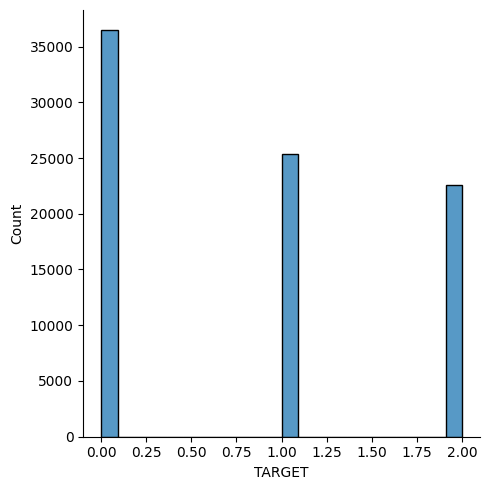

In [ ]:
sns.displot(train['TARGET'])

TARGET 피처의 값은 [0 : 강도, 1 : 절도, 2 : 상해] 로 인코딩되어 있습니다.  
강도 데이터가 상대적으로 남은 두 데이터보다 많은 것을 확인할 수 있습니다.  


### 전체 데이터 분포 확인  
위에서 확인한 TARGET 변수를 제외하고 각 피처의 분포를 확인하겠습니다.  

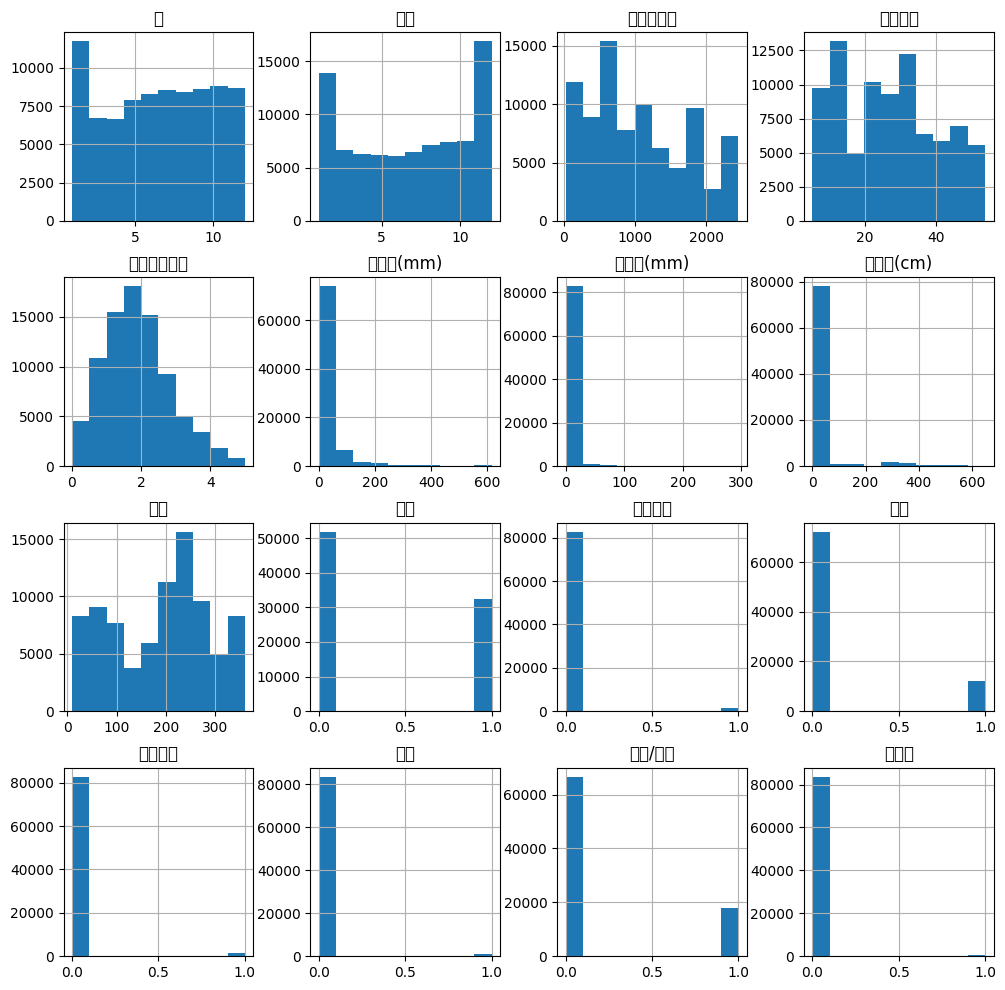

In [ ]:
except_target = train.drop('TARGET', axis = 1)
except_target.hist(figsize = (12,12))
plt.show()

안개, 짙은안개 등 날씨와 관련된 일부 피처의 값이 0 혹은 1의 값만 가진다는 것을 확인할 수 있습니다.  
그 외에는 풍향의 일부 값이 300을 초과합니다.  
이를 통해 풍향이 동서남북의 형태가 아닌 각도를 의미하는 것을 알 수 있습니다.  


### 시간대별 발생 범죄 빈도 확인

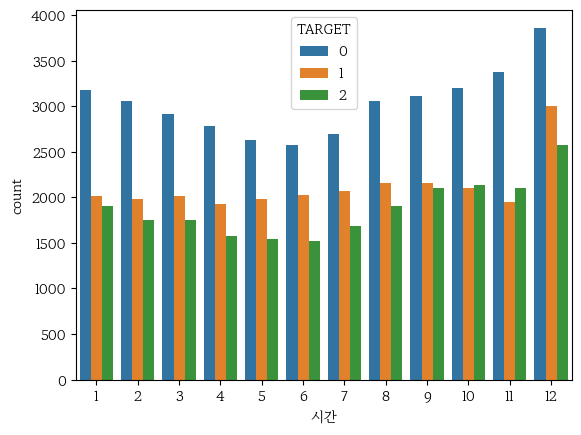

In [ ]:
sns.countplot(x = '시간', hue = 'TARGET', data = train)
plt.show()

### 이상치 확인  
데이터 내부에는 평균적인 관측치와 멀리 떨어진 이상치가 존재하는 경우도 있습니다.  
boxplot을 사용하여 이상치를 확인할 수 있는데,    
일부 피처의 이상치를 확인해보겠습니다.   

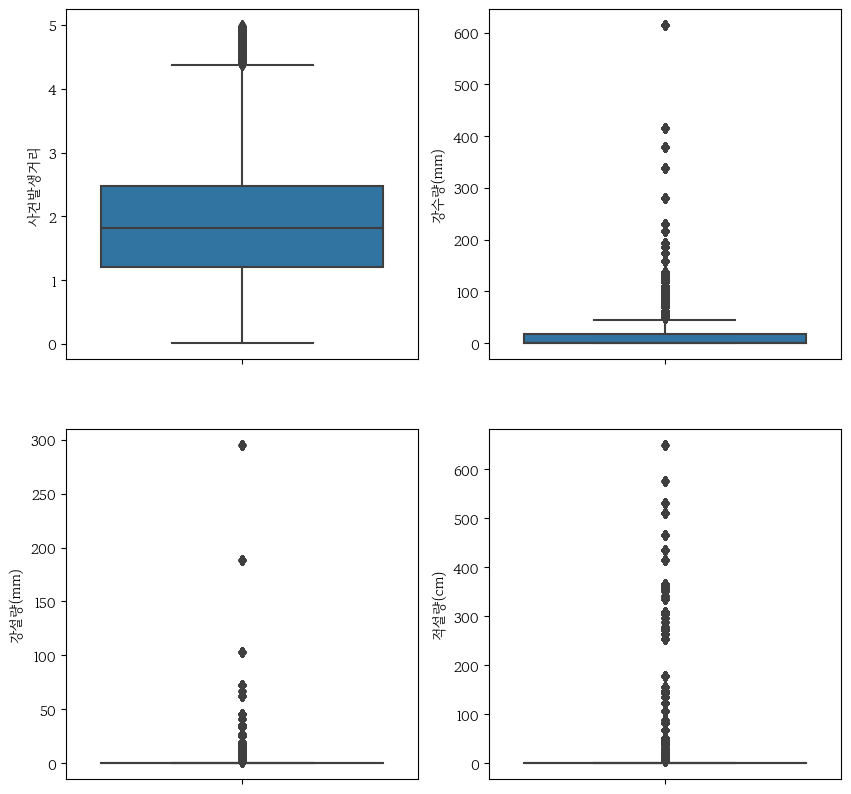

In [ ]:
fig, axes = plt.subplots(2,2, figsize = (10,10))

sns.boxplot(y = train['사건발생거리'], ax = axes[0][0])
sns.boxplot(y = train['강수량(mm)'], ax = axes[0][1])

sns.boxplot(y = train['강설량(mm)'], ax = axes[1][0])
sns.boxplot(y = train['적설량(cm)'], ax = axes[1][1])

plt.show()

# 상관관계 확인  

feature간의 상관관계를 확인함으로써 종속변수와 연관된 변수, 다중공선성이 일어날 변수 등을 확인할 수 있습니다.    
머신러닝에서 피처들 간에 상관관계가 높아서 발생하는 문제를 다중공선성이라 합니다.    
다중공선성이 존재하는 변수들을 제거하지 않을 경우 모델의 예측 성능이 저하될 수 있습니다.  

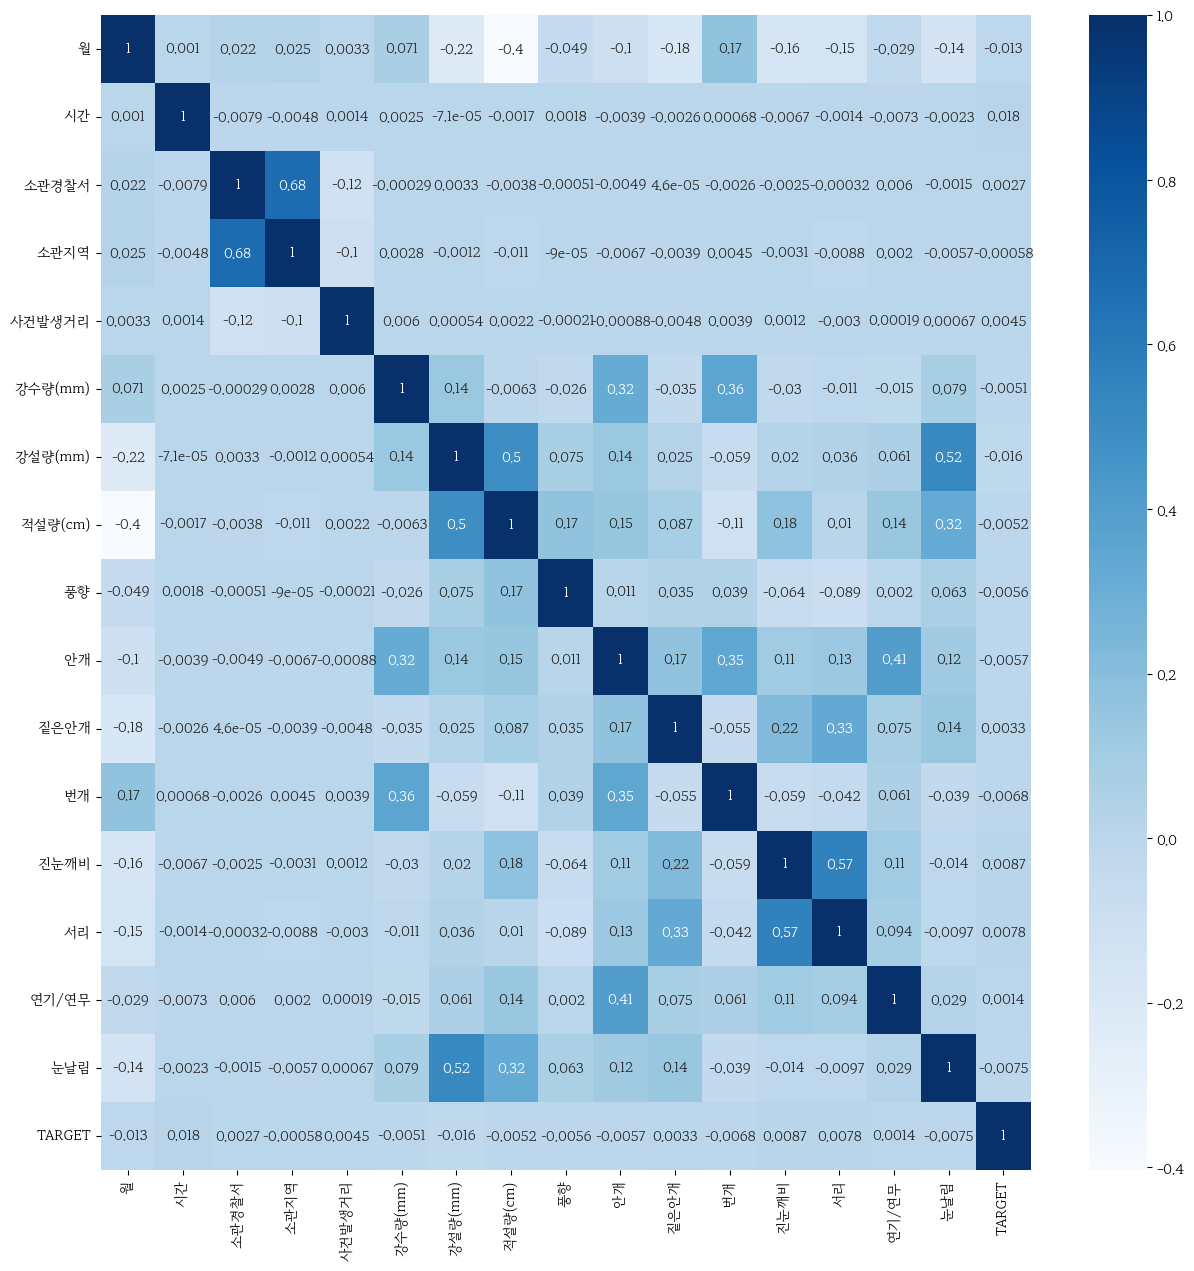

In [ ]:
plt.figure(figsize = (15,15), dpi = 100)
sns.heatmap(train.corr(), annot = True, cmap = 'Blues')
plt.show()

In [ ]:
check = train.drop(['ID'] , axis = 1)

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,9,화요일,10,137,8.0,2.611124,0.0,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,11,화요일,6,438,13.0,3.209093,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,8,일요일,6,1729,47.0,1.619597,0.0,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(check.values , i) for i in range(check.shape[1])]
vif2['features'] = check.columns
vif2 = vif2.round(2)
vif2 = vif2.sort_values(by = "VIF")

In [ ]:
vif2

,VIF,features
10,1.23,짙은안개
15,1.45,눈날림
5,1.47,강수량(mm)
11,1.54,번개
14,1.59,연기/연무
12,1.60,진눈깨비
13,1.65,서리
6,1.76,강설량(mm)
7,1.77,적설량(cm)
16,1.95,TARGET
